In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread

In [9]:
def carregar_imagem(caminho):
    return imread(caminho)

In [10]:
def separar_canais(imagem):
    canal_vermelho = imagem[:, :, 0]  # Canal vermelho
    canal_verde = imagem[:, :, 1]  # Canal verde
    canal_azul = imagem[:, :, 2]  # Canal azul
    return canal_vermelho, canal_verde, canal_azul

In [11]:
def reconstruir_com_canal(imagem, canal):
    altura, largura, _ = imagem.shape
    nova_imagem = np.zeros((altura, largura, 3), dtype=imagem.dtype)
    if canal == 'R':
        nova_imagem[:, :, 0] = imagem[:, :, 0]
    elif canal == 'G':
        nova_imagem[:, :, 1] = imagem[:, :, 1]
    elif canal == 'B':
        nova_imagem[:, :, 2] = imagem[:, :, 2]
    return nova_imagem

In [12]:
def converter_para_cinza(imagem):
    canal_vermelho, canal_verde, canal_azul = separar_canais(imagem)
    cinza = 0.299 * canal_vermelho + 0.587 * canal_verde + 0.114 * canal_azul
    return cinza.astype(imagem.dtype)

In [13]:
def menu():
    print("Escolha uma opção:")
    print("1 - Visualizar apenas o canal Vermelho (R)")
    print("2 - Visualizar apenas o canal Verde (G)")
    print("3 - Visualizar apenas o canal Azul (B)")
    print("4 - Converter para escala de cinza")
    return int(input("Digite o número da sua escolha: "))

Escolha uma opção:
1 - Visualizar apenas o canal Vermelho (R)
2 - Visualizar apenas o canal Verde (G)
3 - Visualizar apenas o canal Azul (B)
4 - Converter para escala de cinza


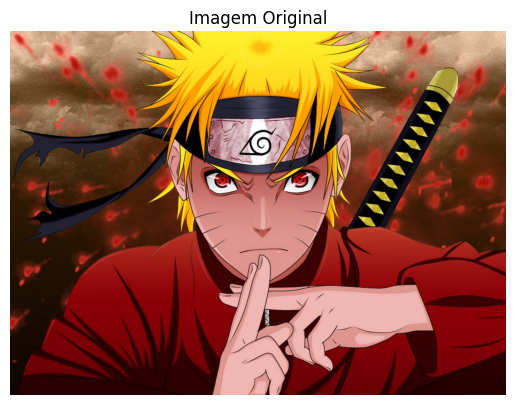

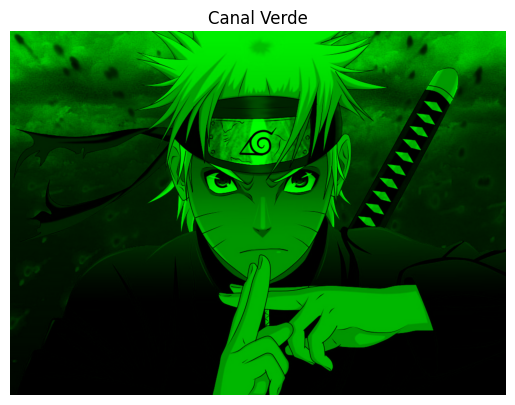

In [14]:
def main():
    caminho = input("Digite o caminho da imagem: ex.:../images/img-naruto.jpg ")
    imagem = carregar_imagem(caminho)

    plt.figure("Imagem Original")
    plt.imshow(imagem)
    plt.axis('off')
    plt.title("Imagem Original")

    escolha = menu()

    if escolha == 1:
        resultado = reconstruir_com_canal(imagem, 'R')
        titulo = "Canal Vermelho"
    elif escolha == 2:
        resultado = reconstruir_com_canal(imagem, 'G')
        titulo = "Canal Verde"
    elif escolha == 3:
        resultado = reconstruir_com_canal(imagem, 'B')
        titulo = "Canal Azul"
    elif escolha == 4:
        resultado = converter_para_cinza(imagem)
        titulo = "Imagem em Escala de Cinza"
    else:
        print("Opção inválida!")
        return
    
    plt.figure(titulo)
    if escolha == 4:
        plt.imshow(resultado, cmap='gray')  
    else:
        plt.imshow(resultado)  
    plt.axis('off')
    plt.title(titulo)

    plt.show()

if __name__ == "__main__":
    main()